In [1]:
# Neural networks often overfit due to high model complexity.
# For example, a single neuron can only capture a simple linear boundary,
# whereas a large network with thousands of neurons may try to memorize
# every small detail in the training data, leading to overfitting.
#
# Common strategies to reduce overfitting:
# 1. Increase training data (e.g., data augmentation).
# 2. Reduce model complexity.
# 3. Apply regularization techniques:
#    - Dropout
#    - Early stopping
#    - L1/L2 regularization (L2 is more widely used).
#
# In this code, we focus on L2 regularization.


In [26]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import regularizers

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [9]:
X,y=make_moons(100,noise=0.25,random_state=2)

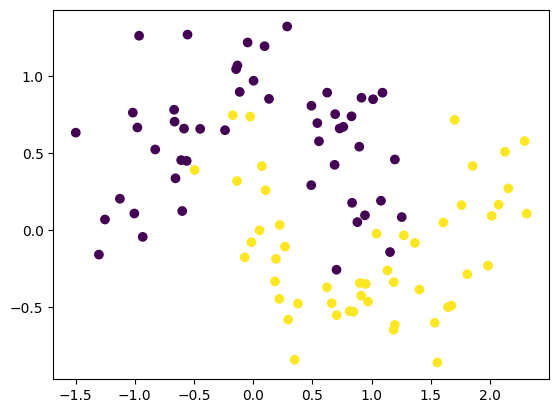

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [18]:
model=Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
adam=Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

history=model.fit(X,y,validation_split=0.2,epochs=2000,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


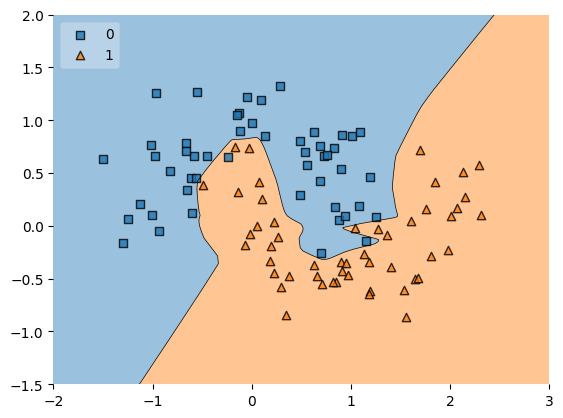

In [20]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

In [16]:
# Here we can clearly observe overfitting.
# The model performs well on the training data but fails to generalize on the test data,
# as it has memorized training details instead of learning underlying patterns.


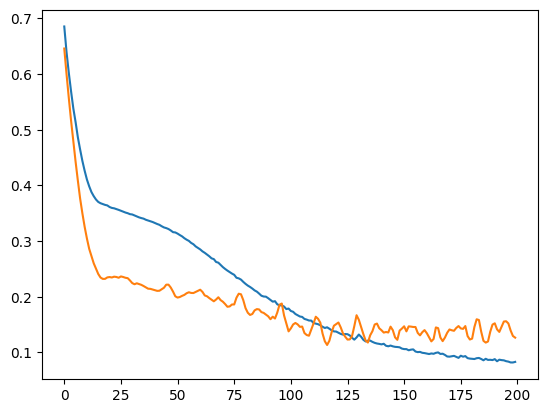

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [21]:
###now we will use l2 reg to overcome this problem

In [28]:
from tensorflow.keras import regularizers

model2 = Sequential()

model2.add(Dense(128, input_dim=2, activation="relu",
                 kernel_regularizer=regularizers.l2(0.05)))
model2.add(Dense(128, activation="relu",
                 kernel_regularizer=regularizers.l2(0.03)))
model2.add(Dense(1, activation="sigmoid"))

model2.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


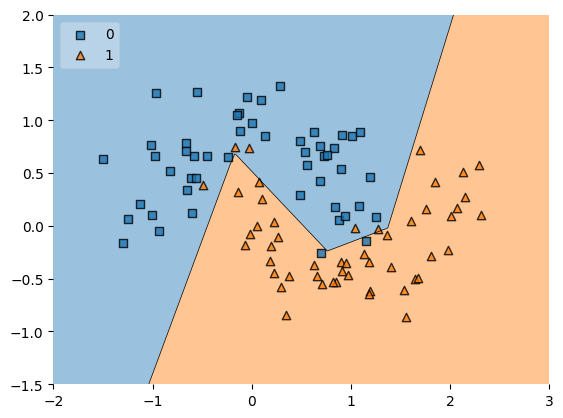

In [30]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

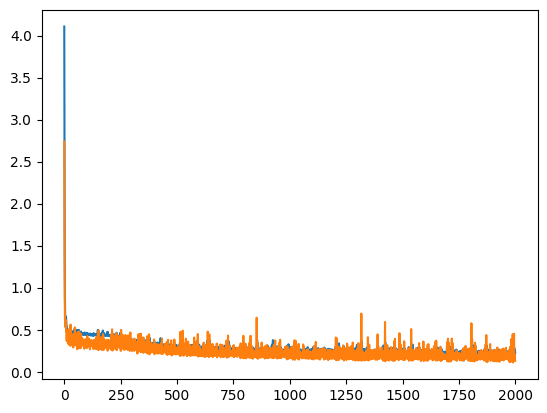

In [31]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [32]:
model_weight_layer = model.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

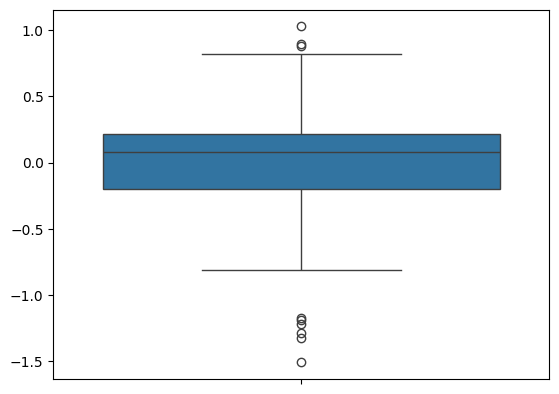

In [34]:
sns.boxplot(model_weight_layer)

<Axes: >

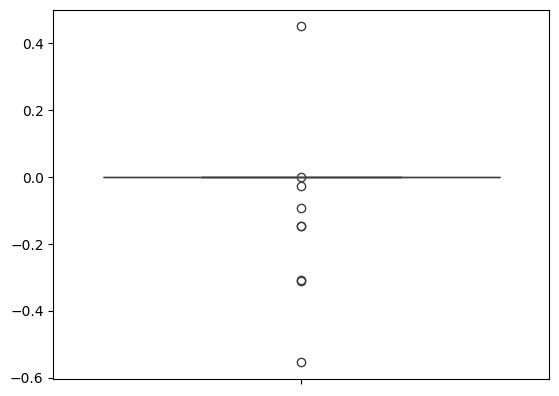

In [35]:
sns.boxplot(model2_weight_layer1)

/tmp/ipython-input-3152169660.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model_weight_layer)
/tmp/ipython-input-3152169660.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

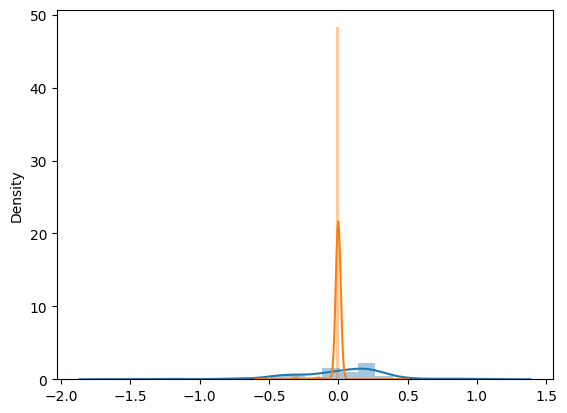

In [36]:
sns.distplot(model_weight_layer)
sns.distplot(model2_weight_layer1)